In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df=pd.read_csv("./seeds_dataset.txt",sep="\t",header=None,names=["a","b","c","d","e","f","g","category"])
print("Size of the dataframe = ", df.shape)
df.head()

Size of the dataframe =  (210, 8)


,a,b,c,d,e,f,g,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [60]:
# Get the general information of the features
df.info()
print("\nColumn names in the data: ")
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   a         210 non-null    float64
 1   b         210 non-null    float64
 2   c         207 non-null    float64
 3   d         210 non-null    float64
 4   e         209 non-null    float64
 5   f         210 non-null    float64
 6   g         206 non-null    float64
 7   category  206 non-null    float64
dtypes: float64(8)
memory usage: 13.2 KB

Column names in the data: 


Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'category'], dtype='object')

In [61]:
df=df.dropna(axis=0,how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 209
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   a         199 non-null    float64
 1   b         199 non-null    float64
 2   c         199 non-null    float64
 3   d         199 non-null    float64
 4   e         199 non-null    float64
 5   f         199 non-null    float64
 6   g         199 non-null    float64
 7   category  199 non-null    float64
dtypes: float64(8)
memory usage: 14.0 KB


In [62]:
categories=df['category']
#print(categories)
colors=np.array(categories)
print(colors)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3.]


In [63]:
df=df.drop(["category"], axis=1)
df.head()

,a,b,c,d,e,f,g
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [64]:
#Normalization
for i in list(df.columns):
    mean=np.mean(df[i])
    std=np.std(df[i])
    df[i]=(df[i]-mean)/std
df.head()

,a,b,c,d,e,f,g
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962
3,-0.370368,-0.501725,1.061395,-0.721281,0.300679,-0.981475,-1.252656
4,0.419297,0.301550,1.401014,0.033559,0.785615,-1.597530,-0.499825


In [65]:
def pca(X, n_components):
    covariance = np.cov(X.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
     
    eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]#Sort eigenvectors
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    
    selected_eigenvectors = np.array([eig_pairs[i][1] for i in range(n_components)])
    
    transformed_data = np.dot(X, selected_eigenvectors.T)
    
    return transformed_data, selected_eigenvectors

In [66]:
transformed_data, top_eigenvectors=pca(df,n_components=2)
print(transformed_data)
#print(top_eigenvectors)

[[ 0.26372868 -0.82650239]
 [-0.05386409 -1.97046241]
 [-0.50366317 -1.94083014]
 [-0.63771744 -1.96954507]
 [ 1.05484813 -2.12499123]
 [-0.38352867 -1.67392746]
 [-0.1961119  -0.4590484 ]
 [ 1.71113938 -0.35765287]
 [ 1.3889458  -1.06119517]
 [ 0.01391425  0.4185956 ]
 [-0.62234481 -1.6042792 ]
 [-0.97787912 -0.89011436]
 [-0.96423015 -0.89878166]
 [-1.05783125 -0.9880749 ]
 [-0.5607097  -1.07236908]
 [-0.82503375 -1.1402507 ]
 [ 0.63240231 -2.22236197]
 [-0.27690753 -2.83389723]
 [-1.7871329  -0.34931328]
 [-0.61563284 -0.18694629]
 [-0.52909277 -0.73800378]
 [ 0.80881026 -2.38495557]
 [-2.02838285 -1.63441384]
 [-0.05510418 -1.06161463]
 [ 1.04436739 -1.69420858]
 [-1.60785603 -0.57610997]
 [-1.75012483 -0.78231936]
 [-0.50571696 -1.0779023 ]
 [-1.1363428  -0.14252338]
 [-1.16273574 -1.63605238]
 [ 0.3236216  -0.2789292 ]
 [-0.53681112  0.45782136]
 [-0.65499724 -1.16029039]
 [ 0.3469535  -0.95997914]
 [ 1.00993321 -0.33092519]
 [ 1.80623785 -1.12714018]
 [ 0.09009483 -0.64094499]
 

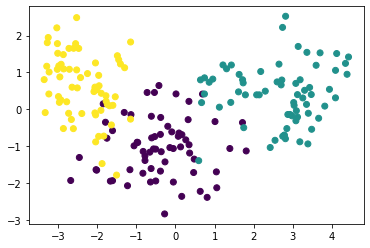

In [67]:
plt.scatter(transformed_data[:,0],transformed_data[:,1],c=colors, cmap='viridis')
plt.show()

In [68]:
def K_means(X,n_clusters=3,max_iter=1000):
    random_index = np.random.choice(X.shape[0],n_clusters,replace=False)
    centroids = X[random_index]       
    for i in range(max_iter):
        dists = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(dists, axis=0)           
        #Update centroids
        for j in range(n_clusters):
            centroids[j] = X[labels == j].mean(axis=0)
        
    return labels,centroids

In [69]:
labels,centroids=K_means(transformed_data)
print(labels)
#print(centroids)

[2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 2 1 2 1 2 1 1 1 2 1 1 1 1]


In [70]:
#silhouette_coefficient
S=[]
for i in range(len(transformed_data)):
    
    a_dists=[]
    b1_dists=[]
    b2_dists=[]
    
    label_list=[]
    for w in set(labels):
        label_list.append(w)
    i_label=labels[i]
    label_list.remove(i_label)
    
    for j in range(len(transformed_data)):
        if labels[j]==i_label:
            dist=np.linalg.norm(transformed_data[i] - transformed_data[j])
            a_dists.append(dist)
        elif labels[j]==label_list[0]:
            dist=np.linalg.norm(transformed_data[i] - transformed_data[j])
            b1_dists.append(dist)
        elif labels[j]==label_list[1]:
            dist=np.linalg.norm(transformed_data[i] - transformed_data[j])
            b2_dists.append(dist)

    a=np.sum(a_dists)/len(a_dists)
    b1=np.sum(b1_dists)/len(b1_dists)
    b2=np.sum(b2_dists)/len(b2_dists)

    b=np.min([b1,b2])
    s=(b-a)/np.max([a,b])
    S.append(s)

print("silhouette_coefficient:",np.mean(S))  

silhouette_coefficient: 0.5008651861835253


In [71]:
# rand_index
pairs_true=[]
pairs_label=[]
for i in range(len(colors)):
    for x in colors[i+1:]:
        pairs_true.append((colors[i],x))
for i in range(len(labels)):
    for x in labels[i+1:]:
        pairs_label.append((labels[i],x))
        
a=0
b=0

for i in range(len(pairs_true)):
    if pairs_true[i][0]==pairs_true[i][1] and pairs_label[i][0]==pairs_label[i][1]:
        a+=1
    elif pairs_true[i][0]!=pairs_true[i][1] and pairs_label[i][0]!=pairs_label[i][1]:
        b+=1
print("rand index: ",2*(a + b) / (len(colors)*(len(colors)-1)))

rand index:  0.9051824780467996
